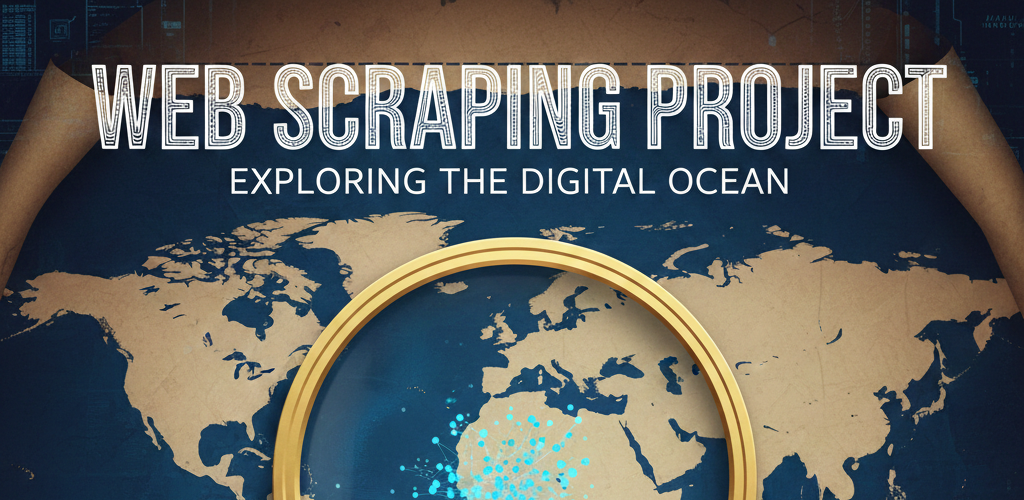

In [6]:
from IPython.display import Image, display
display(Image("../img/fao.png"))

# Ejemplo de WebScraping (FAO) - únicos fines educativos - Enero 2026

Descripción del ejercicio

En este Jupyter Notebook se presenta un ejemplo práctico de web scraping aplicado a una base de datos que ya tenemos, y queremos enriquecer.

Para ello, vamos a hacer un WebScrapping de una página que contiene el nombre de cada zona FAO

Esto hay varias formas de hacerlo, también se puede definir a mano el mapa y listo. Pero la idea es aplicarlo con Selenium y BeautifulSoup para que
lo veáis.

Debe tenerse en cuenta que el código es susceptible a cambios, ya que cualquier modificación en la estructura de la página web (HTML, clases CSS, identificadores, etc.) puede requerir ajustes en el código para que el proceso de extracción continúe funcionando correctamente.

In [1]:
import pandas as pd

fao = pd.read_csv("../files/fao_92.csv", index_col=0)

#La fuente de este csv es: https://www.mapa.gob.es/es/estadistica/temas/estadisticas-pesqueras/pesca-maritima/estadistica-capturas-desembarcos/

In [2]:
fao.head()

,Año,Taxonómico,AL3,Zona,Peso vivo (kg),cód. CEIUAPA,Nombre_grupo CEIUAPA
0,1992,11004001XX,SKA,21,1473000.0,38,"Tiburones, rayas y quimeras"
1,1992,110XXXXXXX,SRX,37,397483.0,38,"Tiburones, rayas y quimeras"
2,1992,110XXXXXXX,SRX,99,1707917.0,38,"Tiburones, rayas y quimeras"
3,1992,1210501210,SAA,37,1643343.0,35,"Arenques, sardinas y anchoas"
4,1992,12105012XX,SIX,27,520000.0,35,"Arenques, sardinas y anchoas"


Ahora podemos hacer un map, con un web scraping por ejemplo, que me coja de una base esos números, y me construya una nueva columna con el nombre del caladero.

Aquí, dependerá del dataframe para buscar la fuente de donde recoger esos datos.

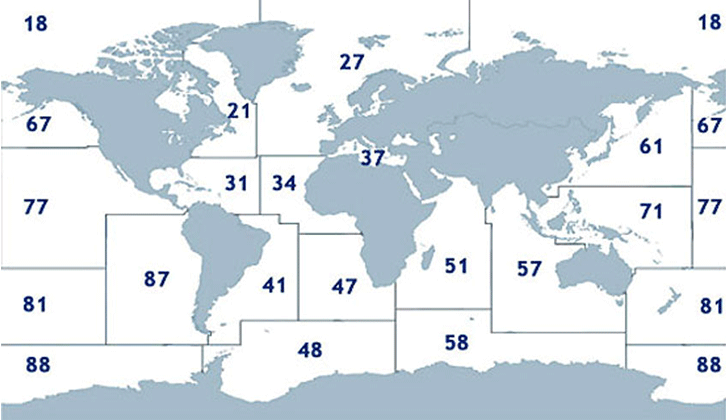

In [3]:
from IPython.display import Image, display
display(Image("../img/zonas_fao.png"))

In [3]:
# ¿Cuáles son mis zonas?

fao["Zona"].unique()

array(['21', '37', '99', '27', '34', '41', '47', '48', '51', '#¡VALOR!',
       '57', '31', '87', '77', '81', '58', '88', '71', '61', '67'],
      dtype=object)

In [4]:
# Aparece #¡VALOR! , es un elemento de número no válido --> Hay un error en el dato

# Si queréis podemos ver como de significativo es, porque a lo mejor tenemos sólo un dato así...no sabemos
# Porcentaje de '#¡VALOR!'

# Contar cuántos '#¡VALOR!' hay
num_valor = (fao['Zona'] == '#¡VALOR!').sum()

# Total de datos
total = len(fao['Zona'])

# Porcentaje de '#¡VALOR!'
porcentaje = (num_valor / total) * 100

print(f"Hay {num_valor} datos correspondientes a Zona = #¡VALOR! de un total de {total} de datos, eso es un {porcentaje:.2f}%")


Hay 34 datos correspondientes a Zona = #¡VALOR! de un total de 29789 de datos, eso es un 0.11%


In [5]:
fao = fao[fao['Zona'] != '#¡VALOR!']   #Esto es para borrar esos datos VALOR, que en este caso concreto, no necesitamos para el ejemplo de WS

In [9]:
from selenium import webdriver               # Importa Selenium para controlar el navegador
from selenium.webdriver.common.by import By  # Permite localizar elementos por CSS, XPath, etc.
from time import sleep                       # Permite pausar la ejecución unos segundos

# Lista de códigos FAO que quieres mapear
fao_codigos = [21, 37, 99, 27, 34, 41, 47, 48, 51, 57, 31, 87, 77, 81, 58, 88, 71,
       61, 67]  # Puedes agregar más códigos si quieres mapearlos todos

# Crear un diccionario vacío donde guardaremos {codigo: nombre_zona}
fao_map = {}

# Iniciar el navegador Chrome controlado por Selenium
driver = webdriver.Chrome()

# Maximizar ventana para asegurar que todos los elementos carguen
driver.maximize_window()

# Abrir la página web del mapa FAO
driver.get("https://www.garciden.com/en/business/mapa-fao/")

# Esperar 5 segundos a que la página cargue completamente, esto da tiempo de carga a la página
sleep(5)

# Buscar todos los elementos <span> con clase 'numero'
# Estos spans contienen los códigos FAO
spans = driver.find_elements(By.CSS_SELECTOR, "span.numero")

# Recorrer cada span encontrado
for span in spans:
    # Extraer el texto del span y limpiar espacios y puntos
    # Por ejemplo, "21." -> "21"
    codigo_texto = span.text.strip().replace(".", "")
    
    try:
        # Intentar obtener el nombre de la zona que está justo después del número
        # following-sibling::text()[1] busca el primer nodo de texto hermano
        nombre_zona = span.find_element(By.XPATH, "./following-sibling::text()[1]").text
    except:
        # Cogemos todo el texto del bloque donde está el número
        parent_text = span.find_element(By.XPATH, "..").text
        # Quitar el texto del span (el número) para quedarse solo con el nombre de la zona
        nombre_zona = parent_text.replace(span.text, "").strip()
    
    # Guardar en el diccionario: {codigo: nombre_zona}
    fao_map[codigo_texto] = nombre_zona
    
    # Mostrar en pantalla el mapeo que se ha hecho
    print(f"{codigo_texto} -> {nombre_zona}")

# Cerrar el navegador
driver.quit()

# Mostrar el diccionario completo con todos los códigos mapeados
print(fao_map)


27 -> Atlántico Noroeste.
18 -> Mar Ártico.
51 -> Océano Índico Occidental.
57 -> Océano Índico Oriental.
61 -> Pacífico Noroeste.
67 -> Pacífico Noroeste.
21 -> Atlántico Noroeste.
71 -> Pacífico Centro-Oeste.
77 -> Pacífico Centro-Este.
31 -> Atlántico Centro-Oeste.
34 -> Atlántico Centro-Este.
37 -> Mar Mediterráneo.
37 -> Mar Negro.
58 -> Océano Índico Antártico.
81 -> Pacífico Suroeste.
87 -> Pacífico Sureste.
41 -> Atlántico Suroeste.
47 -> Atlántico Sureste.
88 -> Pacífico Antártico.
48 -> Atlántico Antártico.
58 -> Océano Índico Antártico.
{'27': 'Atlántico Noroeste.', '18': 'Mar Ártico.', '51': 'Océano Índico Occidental.', '57': 'Océano Índico Oriental.', '61': 'Pacífico Noroeste.', '67': 'Pacífico Noroeste.', '21': 'Atlántico Noroeste.', '71': 'Pacífico Centro-Oeste.', '77': 'Pacífico Centro-Este.', '31': 'Atlántico Centro-Oeste.', '34': 'Atlántico Centro-Este.', '37': 'Mar Negro.', '58': 'Océano Índico Antártico.', '81': 'Pacífico Suroeste.', '87': 'Pacífico Sureste.', '41':

In [10]:
fao["Nombre_Zona"]=fao["Zona"].astype(str).map(fao_map)

# Ahora creo una columna llamada "Nombre_Zona" donde voy a relacionar ese mapa

In [11]:
fao.head()

,Año,Taxonómico,AL3,Zona,Peso vivo (kg),cód. CEIUAPA,Nombre_grupo CEIUAPA,Nombre_Zona
0,1992,11004001XX,SKA,21,1473000.0,38,"Tiburones, rayas y quimeras",Atlántico Noroeste.
1,1992,110XXXXXXX,SRX,37,397483.0,38,"Tiburones, rayas y quimeras",Mar Negro.
2,1992,110XXXXXXX,SRX,99,1707917.0,38,"Tiburones, rayas y quimeras",NaN
3,1992,1210501210,SAA,37,1643343.0,35,"Arenques, sardinas y anchoas",Mar Negro.
4,1992,12105012XX,SIX,27,520000.0,35,"Arenques, sardinas y anchoas",Atlántico Noroeste.


Algunos extras para refinar salida de datos:

In [ ]:
# Aquí tenemos NaN, correspondiente a la zona FAO 99 se usa para indicar "otros", podemos cambiar ese NaN por Otros en este caso

# Esto siempre, tirar de documentación, buscad con criterio por que esos NaN, a que corresponden, son relevantes para mi análisis...

In [12]:
fao["Nombre_Zona"] = fao["Nombre_Zona"].fillna("Otros")

In [13]:
fao.head()

,Año,Taxonómico,AL3,Zona,Peso vivo (kg),cód. CEIUAPA,Nombre_grupo CEIUAPA,Nombre_Zona
0,1992,11004001XX,SKA,21,1473000.0,38,"Tiburones, rayas y quimeras",Atlántico Noroeste.
1,1992,110XXXXXXX,SRX,37,397483.0,38,"Tiburones, rayas y quimeras",Mar Negro.
2,1992,110XXXXXXX,SRX,99,1707917.0,38,"Tiburones, rayas y quimeras",Otros
3,1992,1210501210,SAA,37,1643343.0,35,"Arenques, sardinas y anchoas",Mar Negro.
4,1992,12105012XX,SIX,27,520000.0,35,"Arenques, sardinas y anchoas",Atlántico Noroeste.


In [14]:
# Eliminar punto final de los Nombres de zona:

fao["Nombre_Zona"]=fao["Nombre_Zona"].str.rstrip(".")


In [15]:
fao.head(15)

,Año,Taxonómico,AL3,Zona,Peso vivo (kg),cód. CEIUAPA,Nombre_grupo CEIUAPA,Nombre_Zona
0,1992,11004001XX,SKA,21,1473000.0,38,"Tiburones, rayas y quimeras",Atlántico Noroeste
1,1992,110XXXXXXX,SRX,37,397483.0,38,"Tiburones, rayas y quimeras",Mar Negro
2,1992,110XXXXXXX,SRX,99,1707917.0,38,"Tiburones, rayas y quimeras",Otros
3,1992,1210501210,SAA,37,1643343.0,35,"Arenques, sardinas y anchoas",Mar Negro
4,1992,12105012XX,SIX,27,520000.0,35,"Arenques, sardinas y anchoas",Atlántico Noroeste
5,1992,12105012XX,SIX,99,757.0,35,"Arenques, sardinas y anchoas",Otros
6,1992,1210506401,PIL,27,46932000.0,35,"Arenques, sardinas y anchoas",Atlántico Noroeste
7,1992,1210506401,PIL,37,51943111.0,35,"Arenques, sardinas y anchoas",Mar Negro
8,1992,1210506401,PIL,99,125680989.0,35,"Arenques, sardinas y anchoas",Otros
9,1992,1210506601,SPR,27,10000.0,35,"Arenques, sardinas y anchoas",Atlántico Noroeste
